In [1]:
import os
import requests

pdf_path = "human-nutrition-text.pdf"

if not os.path.exists(pdf_path):
    print(f"[INFO] File doesn't exist, downloading ...")
    url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"
    filename = pdf_path
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"[INFO] The file has been downloaded and saved as {filename}")
    else:
        print(f"[INFO] Failed to download the file. Status code: {response.status_code}")
else:
    print(f"File {pdf_path} exists")

File human-nutrition-text.pdf exists


In [2]:
import fitz
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    """ Performs minor formatting on text."""
    cleaned_text = text.replace("\n", " ").strip()
    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text = text)
        pages_and_texts.append({"page_number": page_number-41,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text)/4,
                                "text": text
                                })
        
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [3]:
import random
random.sample(pages_and_texts, k=2)

[{'page_number': 1050,
  'page_char_count': 1555,
  'page_word_count': 273,
  'page_sentence_count_raw': 12,
  'page_token_count': 388.75,
  'text': 'The DASH Diet  The Dietary Approaches to Stop Hypertension, or DASH diet,  focuses on reducing sodium intake to either 2,300 milligrams per  day (as recommended by the Dietary Guidelines for Americans) or  1,500 milligrams per day for certain populations. The DASH diet  is an evidence-based eating plan that can help reduce high blood  pressure. This plan may also decrease the risk of heart attack,  stroke, diabetes, osteoporosis, and certain cancers.3  DASH tips to lower sodium include:  • Using spices instead of salt to add flavor  • Reading sodium content on processed or canned food labels,  and choosing low-sodium options  • Removing some sodium from canned foods (such as beans) by  rinsing the product before consumption  • Avoiding salt when cooking  DASH dieters are recommended to consume a variety of whole  grains and high-fiber fru

In [4]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,147,3,199.25,Contents Preface University of Hawai‘i at Mā...


In [5]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,199.50,10.52,287.00
std,348.86,560.38,95.83,6.55,140.10
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.00,134.00,5.00,190.50
50%,562.50,1231.50,216.00,10.00,307.88
75%,864.25,1603.50,272.00,15.00,400.88
max,1166.00,2308.00,430.00,39.00,577.00


<!-- Sentence transformer (all-mpnet-base-v2) -->
Split pages into sentences

In [6]:
from spacy.lang.en import English

nlp = English()

# Spacy Sentencizer pipeline
nlp.add_pipe("sentencizer")

# Create doc instance as example
doc = nlp("This is a sentence. This is another sentence. I like anime.")
assert len(list(doc.sents))==3

list(doc.sents)

[This is a sentence., This is another sentence., I like anime.]

In [7]:
pages_and_texts[10]

{'page_number': -31,
 'page_char_count': 973,
 'page_word_count': 179,
 'page_sentence_count_raw': 3,
 'page_token_count': 243.25,
 'text': 'Nonessential and Essential Fatty Acids  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  313  Digestion and Absorption of Lipids  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  319  Tools for Change  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  331  Lipids and the Food Industry  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  340  Lipids and Disease  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  345  A Personal Choice about Lipids  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  351  Part VI. Chapter 6. Protein  Introd

In [8]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    # make sure all sentences are strings (default is spacy datatype) 
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    # count of sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])



  0%|          | 0/1208 [00:00<?, ?it/s]

In [9]:
random.sample(pages_and_texts, k=1)

[{'page_number': 666,
  'page_char_count': 1524,
  'page_word_count': 261,
  'page_sentence_count_raw': 27,
  'page_token_count': 381.0,
  'text': 'Copper  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  Copper, like iron, assists in electron transfer in the electron- transport chain. It is also an enzyme cofactor essential for iron  absorption and transport. The other important function of copper  is as an antioxidant. It is naturally present in several foods and  is generally accessible as a dietary supplement.1 A typical adult  body has a total copper content of 50-120 mg.2 The body maintains  copper level balance through absorption from the intestine and the  release of copper by the liver into bile. 3 Current studies indicate  that copper deficiency may be more frequent than what was  previously discovered, while copper toxicity is rare due to  conventional diets. 4 Symptoms of mild to moderate copper  1. Collins JF. Copper. In

In [10]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,199.50,10.52,287.00,10.32
std,348.86,560.38,95.83,6.55,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,5.00,190.50,5.00
50%,562.50,1231.50,216.00,10.00,307.88,10.00
75%,864.25,1603.50,272.00,15.00,400.88,15.00
max,1166.00,2308.00,430.00,39.00,577.00,28.00


In [11]:
# chunking sentences together
# splitting large pieces of text into smaller ones
# we will split into 10 groups 

num_sentence_chunk_size = 10

def split_list(input_list: list, slice_size: int=num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0,len(input_list), slice_size)]


test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [12]:
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"], slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [13]:
random.sample(pages_and_texts, k=1)

[{'page_number': 191,
  'page_char_count': 1540,
  'page_word_count': 271,
  'page_sentence_count_raw': 14,
  'page_token_count': 385.0,
  'text': 'Other Functions of Chloride  Chloride has several other functions in the body, most importantly  in acid-base balance. Blood pH is maintained in a narrow range and  the number of positively charged substances is equal to the number  of negatively charged substances. Proteins, such as albumin, as well  as bicarbonate ions and chloride ions, are negatively charged and  aid in maintaining blood pH. Hydrochloric acid (a gastric acid  composed of chlorine and hydrogen) aids in digestion and also  prevents the growth of unwanted microbes in the stomach.  Immune-system cells require chloride, and red blood cells use  chloride anions to remove carbon dioxide from the body.  Chloride Imbalances  Low dietary intake of chloride and more often diarrhea can cause  low blood levels of chloride. Symptoms typically are similar to those  of hyponatremia and

In [14]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,199.50,10.52,287.00,10.32,1.53
std,348.86,560.38,95.83,6.55,140.10,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,5.00,190.50,5.00,1.00
50%,562.50,1231.50,216.00,10.00,307.88,10.00,1.00
75%,864.25,1603.50,272.00,15.00,400.88,15.00,2.00
max,1166.00,2308.00,430.00,39.00,577.00,28.00,3.00


In [15]:
# Split each chunk in its own item

import re

pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        # join list of sentences into one paragraph
        joined_sentence_chunk = "".join(sentence_chunk).replace(" ", " ").strip()

        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)    # add a space before any capital letter i.e. starting word of a sentence

        chunk_dict["sentence_chunk"] = joined_sentence_chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~ 4 chars

        pages_and_chunks.append(chunk_dict)


len(pages_and_chunks)

  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [16]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 948,
  'sentence_chunk': 'you might suggest a walk, rollerblading, or going for a swim in the  campus pool. Also, find an activity that you will be motivated to  do. Some people decide to participate in team sports, such as local  soccer or softball leagues, because they enjoy being active with  others or like knowing that a team relies on them. Others prefer to  take a class, such as spinning or yoga, that is led by an instructor  who will motivate them. Still others prefer more solitary pursuits,  such as taking a jog alone in their neighborhood. No matter what  your preference, you are more likely to stick to a workout program  if you enjoy it. Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features interactive learning activities. These activities are  available in the web-based textbook and not available in the  downloadable versions (EPUB, Digital PDF, Print_PDF, or  Open Document). Learn

In [17]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,749.91,128.55,187.48
std,347.79,455.68,80.01,113.92
min,-41.00,14.00,4.00,3.50
25%,280.50,321.50,53.00,80.38
50%,586.00,762.00,132.00,190.50
75%,890.00,1137.50,195.00,284.38
max,1166.00,1870.00,415.00,467.50


In [18]:
# filter to remove chunks with less than 30 tokens cause don't contain much info

min_token_length = 30

for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f"Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}")

Chunk token count: 26.75 | Text: Updated November 6, 2015. Accessed April 15, 2018. 1122  |  Undernutrition, Overnutrition, and Malnutrition
Chunk token count: 18.0 | Text: The Obesity Myth. Gotham Books. Calories In Versus Calories Out  |  1069
Chunk token count: 10.25 | Text: 920  |  Older Adulthood: The Golden Years
Chunk token count: 9.75 | Text: Protein’s Functions in the Body  |  387
Chunk token count: 13.75 | Text: https://doi.org/10.1186/ 1743-7075-4-24. Sulfur  |  637


In [19]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE',
  'chunk_char_count': 320,
  'chunk_word_count': 54,
  'chunk_token_count': 80.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program is licensed under a Creative Commons Attribution 4.0  International License, except where otherwise noted.',
  'chunk_char_count': 212,
  'chunk_word_count': 32,
  'chunk_token_count': 53.0}]

In [20]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_number': 300,
  'sentence_chunk': 'recommended that users complete these activities using a  desktop or laptop computer and in Google Chrome.   An interactive or media element has been  excluded from this version of the text. You can  view it online here:  http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=203    An interactive or media element has been  excluded from this version of the text. You can  view it online here:  http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=203  300  |  The Functions of Lipids in the Body',
  'chunk_char_count': 496,
  'chunk_word_count': 84,
  'chunk_token_count': 124.0}]

In [21]:
# Embed our text chunks from a model from Sentence Transformer

from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device="cpu")

c:\Users\Arjit\OneDrive\Desktop\RAG\simple-local-rag\venv\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Arjit\OneDrive\Desktop\RAG\simple-local-rag\venv\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [22]:
# Example
sentences = ["Sentence Transformer is a easy way to create embeddings", "I like anime", "This is a very good model"]

embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

for sentence, embedding in embeddings_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")
    print("")

Sentence: Sentence Transformer is a easy way to create embeddings
Embedding: [-2.08619591e-02  3.11837103e-02 -2.59458572e-02  5.69022596e-02
 -1.23546273e-02  4.17828793e-03  1.91781111e-02 -3.19253728e-02
 -1.31556895e-02 -1.32209230e-02  2.59638159e-03  2.58037485e-02
 -3.11046019e-02  2.50161160e-02  3.98914777e-02 -5.92492595e-02
  4.23744880e-02  1.41739622e-02 -4.25569192e-02  9.11341421e-03
  2.85300463e-02  7.32972892e-03  2.64866445e-02  4.52444591e-02
 -2.61180177e-02 -2.32647918e-02  5.78083890e-03 -3.42777558e-02
  4.20542955e-02 -9.52104572e-03 -2.51534283e-02  6.12783153e-03
  3.84326391e-02  1.14715947e-02  9.72253815e-07  1.16191618e-02
 -2.78753918e-02 -4.78200288e-03  9.82521847e-03  1.85122842e-03
  3.73485647e-02 -6.27608597e-02  3.65459211e-02  4.01349217e-02
 -4.94312756e-02 -3.23139951e-02  4.44209315e-02  5.40534556e-02
  7.62185603e-02  7.10451826e-02 -3.05459052e-02 -6.80191293e-02
 -5.07233990e-03 -3.29147466e-02  7.97154102e-03  1.57966856e-02
 -1.66369043e

In [23]:
embeddings[0].shape

(768,)

With CPU

In [54]:
%%time

embedding_model.to("cpu")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1685 [00:00<?, ?it/s]

CPU times: total: 18min 1s
Wall time: 4min 42s


With GPU

In [25]:
%%time

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1685 [00:00<?, ?it/s]

CPU times: total: 2min 9s
Wall time: 35.2 s


With GPU in batch

In [24]:
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

In [25]:
%%time
# embed text chunks in batches
text_chunk_embeddings = embedding_model.encode(text_chunks, batch_size=8, convert_to_tensor=True)

text_chunk_embeddings

CPU times: total: 20min 1s
Wall time: 5min 16s


tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]])

In [31]:
# CPU          : 4min 42s
# GPU          : 35.2 s
# GPU in batch : 25.4

In [28]:
save_path = "text_chunks_and_embeddings_df.csv"

In [ ]:
# Save embeddings to file

text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)

text_chunks_and_embeddings_df.to_csv(save_path)

In [29]:
# Import and check that file

text_chunks_and_embeddings_df_load = pd.read_csv(save_path)
text_chunks_and_embeddings_df_load.head()

,Unnamed: 0,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF ...,320,54,80.00,[ 6.74242899e-02 9.02281702e-02 -5.09548699e-...
1,1,-38,Human Nutrition: 2020 Edition by University of...,212,32,53.00,[ 5.52156232e-02 5.92139959e-02 -1.66167356e-...
2,2,-37,Contents Preface University of Hawai‘i at Mā...,797,147,199.25,[ 2.79801786e-02 3.39813903e-02 -2.06426717e-...
3,3,-36,Lifestyles and Nutrition University of Hawai‘...,976,179,244.00,[ 6.82566687e-02 3.81275155e-02 -8.46854225e-...
4,4,-35,The Cardiovascular System University of Hawai...,1037,191,259.25,[ 3.30264382e-02 -8.49764794e-03 9.57158674e-...


In [ ]:
# If embedding DB is large(>1M samples) use vector DB

RETRIEVAL

In [30]:
# Similarity Search (semantic)

import random
import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

df = pd.read_csv("text_chunks_and_embeddings_df.csv")
df["embedding"] = df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))
embeddings = torch.tensor(np.stack(df["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)
pages_and_chunks = df.to_dict(orient="records")

df.head()

,Unnamed: 0,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF ...,320,54,80.00,"[0.0674242899, 0.0902281702, -0.00509548699, -..."
1,1,-38,Human Nutrition: 2020 Edition by University of...,212,32,53.00,"[0.0552156232, 0.0592139959, -0.0166167356, -0..."
2,2,-37,Contents Preface University of Hawai‘i at Mā...,797,147,199.25,"[0.0279801786, 0.0339813903, -0.0206426717, 0...."
3,3,-36,Lifestyles and Nutrition University of Hawai‘...,976,179,244.00,"[0.0682566687, 0.0381275155, -0.00846854225, -..."
4,4,-35,The Cardiovascular System University of Hawai...,1037,191,259.25,"[0.0330264382, -0.00849764794, 0.00957158674, ..."


In [31]:
# embeddings = np.stack(df["embedding"].tolist(), axis=0)
print(embeddings.shape)

torch.Size([1685, 768])


In [32]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device=device)

c:\Users\Arjit\OneDrive\Desktop\RAG\simple-local-rag\venv\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [33]:
query = "good foods for protein"
print(f"Query : {query}")

query_embedding = model.encode(query, convert_to_tensor=True).to("cuda")

# Similarity with dot product (cosine - if models aren't normalised)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query : good foods for protein
[INFO] Time taken to get scores on 1685 embeddings: 0.00189 seconds.


torch.return_types.topk(
values=tensor([0.7729, 0.7647, 0.6743, 0.6743, 0.6634], device='cuda:0'),
indices=tensor([614, 619, 618, 623, 620], device='cuda:0'))

Vector Search

In [34]:
import textwrap

def print_wrap(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [35]:
query = "good foods for protein"

print(f"Query: {query}\n")
print("Results: ")

for score,idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print_wrap(f"Text: {pages_and_chunks[idx]["sentence_chunk"]}")
    print(f"Page Number: {pages_and_chunks[idx]["page_number"]}")
    print("\n")

Query: good foods for protein

Results: 
Score: 0.7729
Text: Dietary Sources of Protein  The protein food group consists of foods made
from meat, seafood,  poultry, eggs, soy, dry beans, peas, and seeds. According
to the  Harvard School of Public Health, “animal protein and vegetable  protein
probably have the same effects on health. It’s the protein  package that’s
likely to make a difference.”1  1. Protein: The Bottom Line. Harvard School of
Public  Proteins, Diet, and Personal Choices  |  411
Page Number: 411


Score: 0.7647
Text: Additionally, a person should consume 8 ounces of cooked seafood  every
week (typically as two 4-ounce servings) to assure they are  getting the healthy
omega-3 fatty acids that have been linked to a  lower risk for heart disease.
Another tip is choosing to eat dry beans,  peas, or soy products as a main dish.
Some of the menu choices  include chili with kidney and pinto beans, hummus on
pita bread,  and black bean enchiladas. You could also enjoy nuts in 

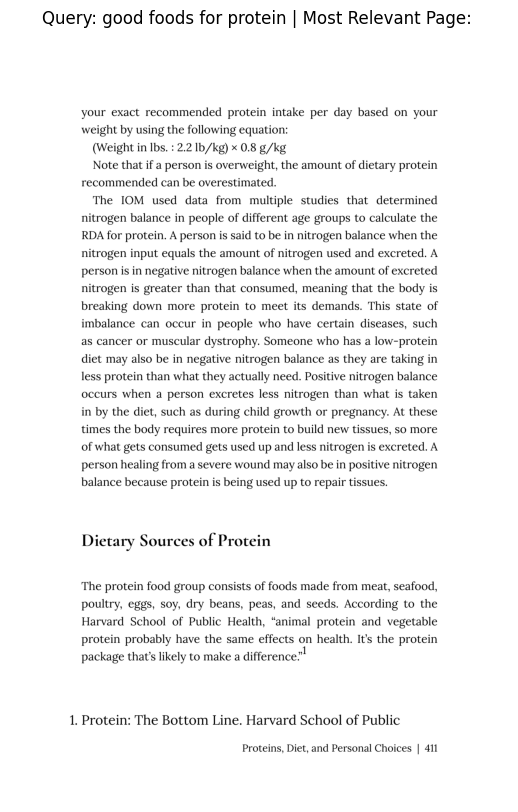

In [36]:
import fitz

pdf_path = "human-nutrition-text.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(pages_and_chunks[top_results_dot_product[1][0]]["page_number"]+41)

img = page.get_pixmap(dpi=300)

# img.save("output_filename.png")
doc.close()

img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))

import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: {query} | Most Relevant Page: ")
plt.axis("off")
plt.show()

Similarity Measure

In [37]:
import torch

def dot_product(v1, v2):
    return torch.dot(v1,v2)

def cosine_product(v1,v2):
    d = torch.dot(v1,v2)
    n1 = torch.sqrt(torch.sum(v1**2))
    n2 = torch.sqrt(torch.sum(v2**2))
    return d/(n1*n2)

Function Semantic Search Pipeline

In [38]:
def retrieve_relevant_resources(query: str, embeddings: torch.tensor, 
                                model: SentenceTransformer=model, 
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    query_embedding = model.encode(query, convert_to_tensor=True)
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores, k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query: str, embeddings: torch.tensor, 
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    
    scores, indices = retrieve_relevant_resources(query=query, 
                                                  embeddings=embeddings, 
                                                  n_resources_to_return=n_resources_to_return)
    
    for score,idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print_wrap(f"Text: {pages_and_chunks[idx]["sentence_chunk"]}")
        print(f"Page Number: {pages_and_chunks[idx]["page_number"]}")
        print("\n")

In [39]:
query = "foods high in fiber"
print_top_results_and_scores(query, embeddings)

[INFO] Time taken to get scores on 1685 embeddings: 0.00011 seconds.
Score: 0.6964
Text: • Change it up a bit and experience the taste and satisfaction of  other
whole grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber,
such as almonds, pistachios, raisins,  and air-popped popcorn. Add an artichoke
and green peas to your dinner plate more  276  |  Carbohydrates and Personal
Diet Choices
Page Number: 276


Score: 0.6810
Text: Dietary fiber is categorized as either water-soluble or insoluble. Some
examples of soluble fibers are inulin, pectin, and guar gum  and they are found
in peas, beans, oats, barley, and rye. Cellulose  and lignin are insoluble
fibers and a few dietary sources of them  are whole-grain foods, flax,
cauliflower, and avocados. Cellulose is  the most abundant fiber in plants,
making up the cell walls and  providing structure. Soluble fibers are more
easily accessible to  bacterial enzymes in the large intestine so they can be
broken down  to a greater

LLM for Local Generation

In [40]:
import torch
gpu_mem_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_mem_gb = round(gpu_mem_bytes / (2**30))
print(gpu_mem_gb)

4


In [104]:
# import torch
# from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

# model_id = "meta-llama/Llama-3.2-1B-Instruct"

# # 4-bit quantization config
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_compute_dtype=torch.float16,  # or torch.bfloat16 if supported
#     bnb_4bit_quant_type="nf4",            # Recommended quant type
#     bnb_4bit_use_double_quant=True        # Helps with compression
# )

# # Load tokenizer
# tokenizer = AutoTokenizer.from_pretrained(model_id)

# # Load model in 4-bit with auto device mapping
# model = AutoModelForCausalLM.from_pretrained(
#     model_id,
#     quantization_config=bnb_config,
#     device_map="auto",  # automatically maps model to GPU if available
#     use_auth_token=True
# )


In [41]:
# Load transformer

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
# from transformers.utils import is_flash_attn_2_available

quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# if (is_flash_attn_2_available() and torch.cuda.get_device_capability(0)[0] >= 8):
#     attn_implementation = "flash_attention_2"
# else:
#     attn_implementation = "sdpa"

model_id = "Qwen/Qwen2.5-1.5B"
# model_id = "meta-llama/Llama-3.2-1B-Instruct"
# model_id = "EleutherAI/pythia-410m-deduped"
# model_id = "google/flan-t5-small"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, 
                                            #  quantization_config=quantization_config, 
                                            #  low_cpu_mem_usage=False,
                                             device_map="cuda"
                                            #  attn_implementation=attn_implementation
                                             )

c:\Users\Arjit\OneDrive\Desktop\RAG\simple-local-rag\venv\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [42]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(model)

1543714304

In [43]:
model

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 1536)
    (layers): ModuleList(
      (0-27): 28 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=1536, out_features=1536, bias=True)
          (k_proj): Linear(in_features=1536, out_features=256, bias=True)
          (v_proj): Linear(in_features=1536, out_features=256, bias=True)
          (o_proj): Linear(in_features=1536, out_features=1536, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (up_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (down_proj): Linear(in_features=8960, out_features=1536, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm()
        (post_attention_layernorm): Qwen2RMSNorm()
      )
    )
    (norm): Qwen2RMSNorm()
  )
  (lm_head): Linear

In [45]:
def get_model_mem_size(model: torch.nn.Module):

    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3) 

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2), 
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(model)

{'model_mem_bytes': 9932960768, 'model_mem_mb': 9472.81, 'model_mem_gb': 9.25}

Generate Text with LLM

In [46]:
input_text = "What are the macronutrients and what are their functions in the body?"
print(f"Input Text: {input_text}")

messages = [
    {"role": "user", "content": input_text}
]

prompt = tokenizer.apply_chat_template(conversation=messages, tokenize=False, add_generation_prompt=True)

print(f"\n Prompt (formatted):\n{prompt}")

Input Text: What are the macronutrients and what are their functions in the body?

 Prompt (formatted):
<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
What are the macronutrients and what are their functions in the body?<|im_end|>
<|im_start|>assistant



In [48]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=256)

print(f"Model output tokens: \n{outputs[0]}")

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


Model output tokens: 
tensor([151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
        151645,    198, 151644,    872,    198,   3838,    525,    279,   8978,
          2248,    332,  31830,    323,   1128,    525,    862,   5746,    304,
           279,   2487,     30, 151645,    198, 151644,  77091,    198,  62301,
           332,  31830,    525,    279,  36393,    429,   3410,   4802,    369,
           279,   2487,     13,   2379,    525,  17779,   1119,   2326,  11059,
            25,  61245,     11,  27796,     11,    323,  49027,     13,   8886,
           315,   1493,   8978,   2248,    332,  31830,    702,    264,   3151,
           729,    304,    279,   2487,   1447,     16,     13,   3261,  33558,
           973,     25,   3261,  33558,    973,    525,    279,   2487,    594,
          6028,   2530,    315,   4802,     13,   2379,    525,  10865,   1495,
          1119,  33223,     11,    892,    374,   1221,   1483,    553,    279,
          2487,   

In [49]:
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model Output (decoded): \n {outputs_decoded}")

Model Output (decoded): 
 <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
What are the macronutrients and what are their functions in the body?<|im_end|>
<|im_start|>assistant
 Macronutrients are the nutrients that provide energy for the body. They are divided into three categories: carbohydrates, proteins, and fats. Each of these macronutrients has a specific function in the body:

1. Carbohydrates: Carbohydrates are the body's primary source of energy. They are broken down into glucose, which is then used by the body to produce ATP (adenosine triphosphate), the body's energy currency. Carbohydrates also provide the body with fiber, which helps to keep the digestive system healthy and can help to regulate blood sugar levels.

2. Proteins: Proteins are made up of amino acids and are essential for building and repairing tissues in the body. They also help to transport nutrients throughout the body and play a role in the immune system. Proteins are also importa

In [50]:
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions
query_list

['What are the macronutrients, and what roles do they play in the human body?',
 'How do vitamins and minerals differ in their roles and importance for health?',
 'Describe the process of digestion and absorption of nutrients in the human body.',
 'What role does fibre play in digestion? Name five fibre containing foods.',
 'Explain the concept of energy balance and its importance in weight management.',
 'How often should infants be breastfed?',
 'What are symptoms of pellagra?',
 'How does saliva help with digestion?',
 'What is the RDI for protein per day?',
 'water soluble vitamins']

In [51]:
import random

query = random.choice(query_list)
print(f"Query: {query}") 

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: What are symptoms of pellagra?
[INFO] Time taken to get scores on 1685 embeddings: 0.00092 seconds.


(tensor([0.4712, 0.3562, 0.3153, 0.3025, 0.2941], device='cuda:0'),
 tensor([ 825,  856, 1540, 1559, 1535], device='cuda:0'))

In [57]:
def prompt_formatter(query: str, context_items: list[dict]) -> str:

    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    base_prompt = """Based on the following context items, please answer the query.
                    Give yourself room to think by extracting relevant passages from the context before answering the query.
                    Don't return the thinking, only return the answer.
                    Make sure your answers are as explanatory as possible.
                    Use the following examples as reference for the ideal answer style.
                    \nExample 1:
                    Query: What are the fat-soluble vitamins?
                    Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
                    \nExample 2:
                    Query: What are the causes of type 2 diabetes?
                    Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
                    \nExample 3:
                    Query: What is the importance of hydration for physical performance?
                    Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
                    \nNow use the following context items to answer the user query:
                    {context}
                    \nRelevant passages: <extract relevant passages from the context here>
                    User query: {query}
                    Answer:""" 

    base_prompt = base_prompt.format(context=context, query=query)
    dialogue_template = [
        {"role": "user",
         "content": base_prompt}
    ]

    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                           tokenize=False,
                                           add_generation_prompt=True)

    return prompt

In [58]:
query = random.choice(query_list)
print(f"Query: {query}")

scores, indices = retrieve_relevant_resources(query=query, embeddings=embeddings)

context_items = [pages_and_chunks[i] for i in indices]

prompt = prompt_formatter(query=query, context_items=context_items)

print(prompt)

Query: water soluble vitamins


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [54]:
%%time 

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, temperature=0.7, do_sample=True,max_new_tokens=256)
output_text = tokenizer.decode(outputs[0])
print(f"Query: {query}")
print(f"RAG answer: \n{output_text.replace(prompt, '')}")

<unknown>:6: SyntaxWarning: invalid escape sequence '\m'
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Functionalize RAG pipeline

In [59]:
def ask(query: str, 
        temperature: float=0.7, 
        max_new_tokens: int=256,
        format_answer_text= True,
        return_answer_only= True):

        scores, indices = retrieve_relevant_resources(query=query, embeddings=embeddings)
        context_items = [pages_and_chunks[i] for i in indices]
        for i, item in enumerate(context_items): 
                item["score"] = scores[i].cpu()
        prompt = prompt_formatter(query=query,
                              context_items=context_items)
        input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
        outputs = model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)
        output_text = tokenizer.decode(outputs[0])

        if format_answer_text:
                # Replace prompt and special tokens
                output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "")
        if return_answer_only:
                return output_text

        return output_text, context_items

In [60]:
query = random.choice(query_list)
print(f"Query: {query}")
ask(query=query,
    temperature=0.2,
    return_answer_only=False)

Query: Describe the process of digestion and absorption of nutrients in the human body.


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
